<a href="https://colab.research.google.com/github/lexsuomi/MIA23/blob/main/mia_tfm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# En primer lugar realizaremos la importación de las librerias de Python:

import pandas as pd
import numpy as np
import scipy as s
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

# A continuación cargamos el conjunto de datos originalmente albergado en el repositorio de Github

datos= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes.csv")

In [ ]:
# Realizamos una primera visualización del conjunto de datos así como de las características principales de este:
datos.head()
datos.dtypes
# nº de columnas del conjunto
datos.columns
# tamaño del conjunto de datos (filas/columnas)
datos.shape
# información sobre valores nulos en el conjunto
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# En primer lugar consultamos los datos faltantes del data set
datos.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Analizamos ahora el número de filas repetidas en nuestro set de datos y eliminamos aquellas repetidas con la siguiente función:

print(f'Tamaño del set antes de eliminar filas repetidas: {datos.shape}')
datos.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar filas repetidas: {datos.shape}')

Tamaño del set antes de eliminar filas repetidas: (768, 9)
Tamaño del set después de eliminar filas repetidas: (768, 9)


In [ ]:
# Realizamos una exploración de la distribución de las variables y caracteristicas de estas
# Esto nos dará una primera información sobre la media y desviación estándar de cada una de las variables
datos.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Renombramos las variables al castellano
datos.columns= ['Embarazos', 'Glucosa', 'TAD', 'Pliegue', 'Insulina', 'IMC', 'FPD', 'Edad', 'DMT2']
datos_e= datos
datos.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Embarazos  768 non-null    int64  
 1   Glucosa    768 non-null    int64  
 2   TAD        768 non-null    int64  
 3   Pliegue    768 non-null    int64  
 4   Insulina   768 non-null    int64  
 5   IMC        768 non-null    float64
 6   FPD        768 non-null    float64
 7   Edad       768 non-null    int64  
 8   DMT2       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


array([[<Axes: title={'center': 'Embarazos'}>,
        <Axes: title={'center': 'Glucosa'}>,
        <Axes: title={'center': 'TAD'}>],
       [<Axes: title={'center': 'Pliegue'}>,
        <Axes: title={'center': 'Insulina'}>,
        <Axes: title={'center': 'IMC'}>],
       [<Axes: title={'center': 'FPD'}>,
        <Axes: title={'center': 'Edad'}>,
        <Axes: title={'center': 'DMT2'}>]], dtype=object)

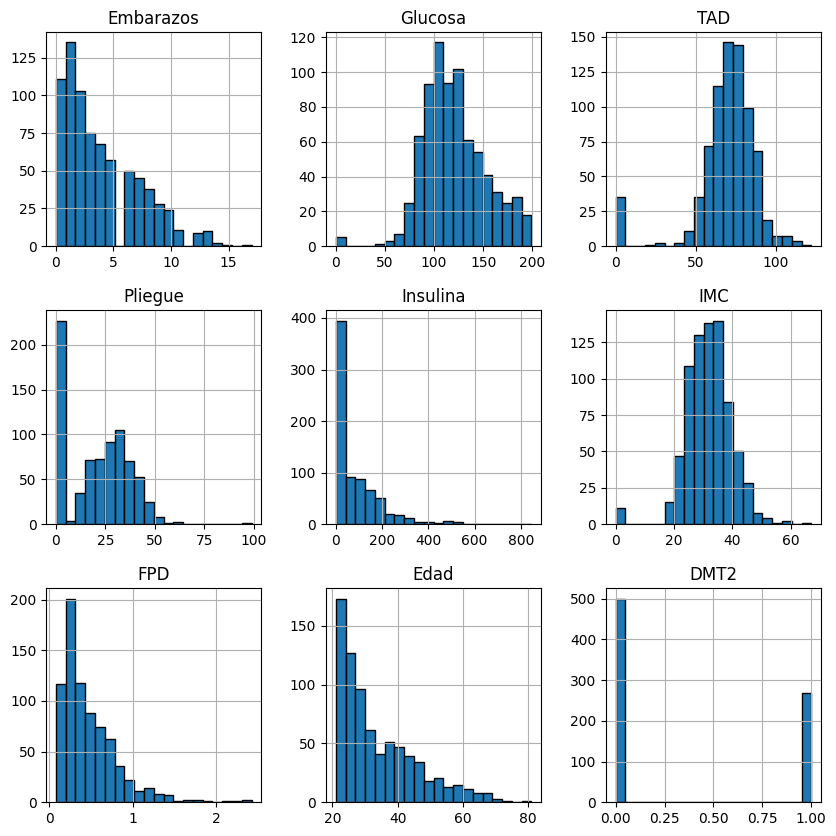

In [ ]:
# En primer lugar realizamos una exploración visual general de todas las variables donde ya podemos observar a simple vista las
# diferentes clases de variables (categóricas y numéricas) así como la distribución de los datos de las variables numéricas.
datos.hist(figsize=(10,10), bins=20, edgecolor="black")

In [ ]:
# Analisis de la correlacion entre las diferentes variables o características
datos.corr()

,Embarazos,Glucosa,TAD,Pliegue,Insulina,IMC,FPD,Edad,DMT2
Embarazos,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucosa,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
TAD,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Pliegue,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulina,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
IMC,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
FPD,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Edad,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
DMT2,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

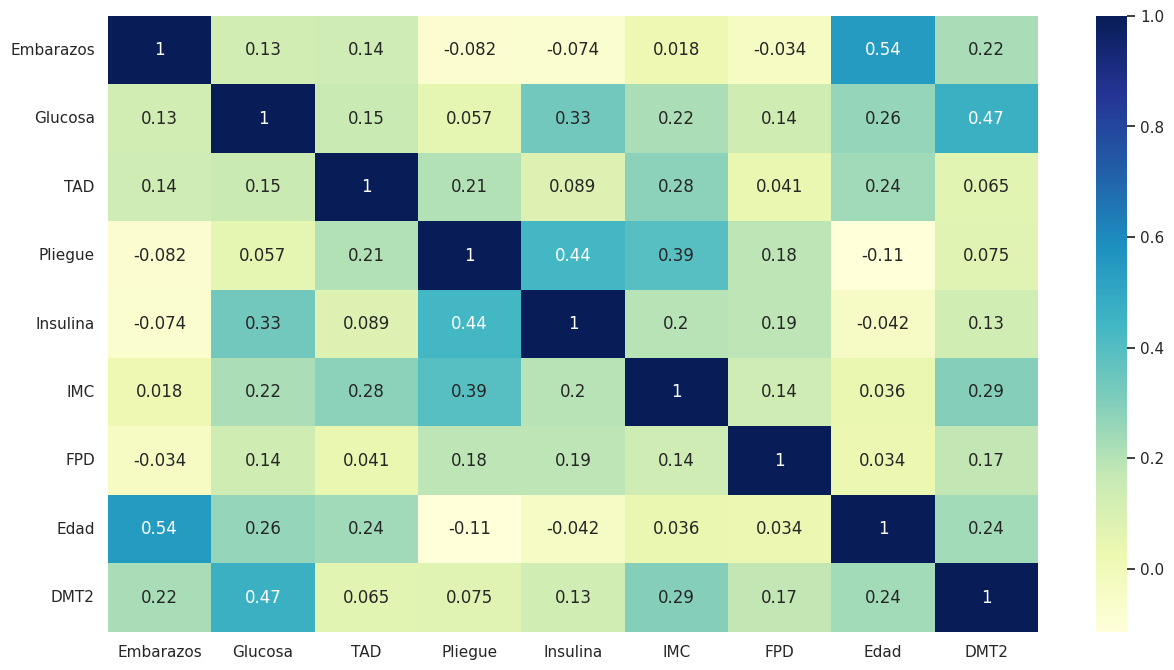

In [ ]:
# Con el objetivo de ir más allá tratando de visualizar la relación entre variables, tenemos la opcion de realizar un mapa de color
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(datos.corr(),annot=True, cmap='YlGnBu')
# A simple vista se puede ver como variables como 'Pliegue', 'Insulina' y 'Glucosa' parecen guardar cierta correlación + entre si
# Resulta llamativo que a pesar de que las anteriores variables se correlacionasen de manera positiva entre si, ninguna salvo 'Glucosa' parece guardar correlación clara con la variable resultado
# Por lo demás se observan correlaciones esperables como 'Pliegue' y 'Edad' 'IMC' o 'Embarazos' y 'Edad'


In [ ]:
# Para clarificar qué variables guardan mayor correlacion con la variable objetivo
datos.corr()["DMT2"].sort_values(ascending=False)

DMT2         1.000000
Glucosa      0.466581
IMC          0.292695
Edad         0.238356
Embarazos    0.221898
FPD          0.173844
Insulina     0.130548
Pliegue      0.074752
TAD          0.065068
Name: DMT2, dtype: float64

# Nueva sección

In [ ]:
## ATENCIÓN ESTE PASO ES FUNDAMENTAL PARA SEPARAR LAS CARACTERISTICAS DE LA ETIQUETA Y PODER REALIZAR CUALQUIER MODELO DE PREDICCIÓN. A PARTIR DE ESTE PASO SEPARAREMOS LOS DOS GRUPOS DE "TRAIN" Y "TEST"
# Separar las caracteristicas de las etiquetas:
# X= el conjunto de datos "extrayendo" la variable resultado/predicción, en este caso DMT2. Con axis=1 se indica que debe buscar el valor en las columnas
# Y= debe tomar únicamente DMT2 por lo tanto no usamos () que expresarian un dataframe, en su lugar usamos [] para indicar una variable del DF

In [ ]:
X= datos.drop(["DMT2"], axis=1)
y= datos["DMT2"]

In [ ]:
# Separamos los datos en entrenamiento-train/ pruebas-test
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.3)

In [ ]:
# Invocamos Sklearn el modelo, en este caso de regresion lineal
from sklearn.linear_model import LinearRegression

modelo=LinearRegression()

In [ ]:
# Entrenamos el modelo con el conjunto de entrenamiento
modelo.fit(X_ent, y_ent)

LinearRegression()

In [ ]:
# Realizamos una prediccion con el conjunto de pruebas una vez entrenado el modelo.

predicciones = modelo.predict(X_pru)

In [ ]:
comparativa= {"Predicción": predicciones, "Valor Real": y_pru}
#realizamos una tabla con pandas del diccionario que acabamos de hacer con comparativa
pd.DataFrame(comparativa)

,Predicción,Valor Real
674,0.350148,0
350,0.272844,0
97,-0.206536,0
202,0.202426,0
431,0.097481,0
...,...,...
137,0.048817,0
443,0.398268,1
86,0.539835,0
95,0.490388,0


In [ ]:
# Calculamos el overfitting del modelo. En el caso de que hubiera sobreajuste los valores de score para entrenamiento y prueba
# se encontrarian muy separados. OVerfitting == valores muy distintos; No Overfitting == valores practicamente iguales.
print(modelo.score(X_ent, y_ent))
print(modelo.score(X_pru, y_pru))

0.3282327396135044
0.2210389338732176


In [ ]:
# Calculo del error cuadrático medio. Para calcular qué tanto estamos fallando en nuestras predicciones

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pru, predicciones)
mse

0.17634320344093118

In [ ]:
# Para intentar reducir este error de prediccion podemos utilizar el escalamiento de los valores de las diferentes variables, ya que si vemos en la tabla de descripción, encontramos mucha variabilidad entre los valores max/min y medios de cada variable.
datos.describe()

,Embarazos,Glucosa,TAD,Pliegue,Insulina,IMC,FPD,Edad,DMT2
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Scaler Escalamiento
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_ent_esc = scaler.fit_transform(X_ent)
x_pru_esc = scaler.fit_transform(X_pru)

In [ ]:
pd.DataFrame(X_ent_esc)

,0,1,2,3,4,5,6,7
0,-1.156758,-0.619507,-0.257182,-0.218363,-0.695367,-1.420298,-0.647817,-1.056016
1,0.341503,0.085585,0.261626,1.229304,-0.017364,0.275310,-0.597857,-0.448213
2,1.839764,0.277883,0.365388,0.473999,0.378871,0.508294,-0.565530,0.506907
3,-0.557454,-0.619507,-0.568467,-0.218363,1.638017,-1.006103,0.416029,-0.882358
4,1.240460,2.361110,0.572911,-1.288378,-0.695367,-0.760176,0.230885,2.938121
...,...,...,...,...,...,...,...,...
532,-0.557454,0.277883,0.261626,0.348115,1.109704,0.158818,0.348437,-0.708700
533,0.041851,-0.972053,-3.577556,-1.288378,-0.695367,-0.514248,0.404274,-0.187725
534,0.341503,0.534280,2.025575,-1.288378,-0.695367,2.178015,-0.721287,0.333249
535,0.041851,-0.074663,0.054103,-1.288378,-0.695367,1.621441,1.268281,-0.621871


In [ ]:
# Invocamos Sklearn el modelo, en este caso de regresion lineal
from sklearn.linear_model import LinearRegression

modelo=LinearRegression()

In [ ]:
# Entrenamos el modelo con el conjunto de entrenamiento
modelo.fit(X_ent_esc, y_ent)

LinearRegression()

In [ ]:
# Realizamos una prediccion con el conjunto de pruebas una vez entrenado el modelo.

predicciones = modelo.predict(X_pru)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
comparativa= {"Predicción": predicciones, "Valor Real": y_pru}
#realizamos una tabla con pandas del diccionario que acabamos de hacer con comparativa
pd.DataFrame(comparativa)

,Predicción,Valor Real
674,22.184069,0
350,22.181227,0
97,12.251548,0
202,24.488969,0
431,16.039694,0
...,...,...
137,16.523408,0
443,24.996627,1
86,26.542525,0
95,20.567512,0


In [ ]:
# Calculamos el overfitting del modelo. En el caso de que hubiera sobreajuste los valores de score para entrenamiento y prueba
# se encontrarian muy separados. OVerfitting == valores muy distintos; No Overfitting == valores practicamente iguales.
print(modelo.score(X_ent_esc, y_ent))
print(modelo.score(x_pru_esc, y_pru))

0.3282327396135044
0.23284005749216197


In [ ]:
# Calculo del error cuadrático medio. Para calcular qué tanto estamos fallando en nuestras predicciones

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pru, predicciones)
mse

611.3453543223146